In [1]:
%tensorflow_version 1.x



import tensorflow as tf
from tensorflow import keras as ks

#tf.reset_default_graph()

#RNN Cells and additional RNN operations.
#contrib è un modulo "sperimentale" in TF 1.x; aggiunto in TF 2.x
#from tensorflow.contrib import rnn
#Preferisco utilizzare keras (come built-in in TensorFlow) che le strutture in tf

print(tf.__version__)

from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Softmax

#Per interoperabilità di Python 2/3
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
from numpy import array
from numpy import argmax

import matplotlib.pyplot as plt

import pandas as pd
from sklearn.metrics import confusion_matrix
#Per data visualization
import seaborn as sns

import time

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

class TimeHistory(ks.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

print("Done")

TensorFlow 1.x selected.
1.15.2
Done


In [2]:
#Import del database MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Struttura dati nel database
print("Numero elementi e dimensione immagini in train set: " + str(train_images.shape))
print("Numero elementi e dimensione immagini in test set: " + str(test_images.shape))
print("Numero elementi label in train set: " + str(len(train_labels)))
print("Numero elementi label in test set: " + str(len(test_labels)))
print("Tipo di struttura del train set: " + str(type(train_images)) + ", composto da " + str(type(train_images[0])))
print("Tipo di struttura del label set: " + str(type(train_labels)) + ", composto da " + str(type(train_labels[0])))
print("Le etichette sono interi; valore più piccolo: " + str(np.amin(train_labels)) + ", valore più grande: " + str(np.amax(train_labels)))

4423680/4422102 [==============================] - 0s 0us/step
Numero elementi e dimensione immagini in train set: (60000, 28, 28)
Numero elementi e dimensione immagini in test set: (10000, 28, 28)
Numero elementi label in train set: 60000
Numero elementi label in test set: 10000
Tipo di struttura del train set: <class 'numpy.ndarray'>, composto da <class 'numpy.ndarray'>
Tipo di struttura del label set: <class 'numpy.ndarray'>, composto da <class 'numpy.uint8'>
Le etichette sono interi; valore più piccolo: 0, valore più grande: 9


In [0]:
#Costanti
batch_size = 256
num_units = batch_size
time_steps = 28
n_features = 28

#Unit in first layer
num_units1 = batch_size
#Unit in second layer
num_units2 = (int)(num_units1 / 2)

num_batches = int(len(train_labels) / batch_size)

n_classes = 10
act = 'softmax'

opt = 'adam'

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#Preprocessing dei dati
#Scalo i valori nel range tra 0 e 1
train_images = train_images / 255.0

test_images = test_images / 255.0

train_images = train_images.reshape(-1, time_steps, n_features)

test_images = test_images.reshape(-1, time_steps, n_features)

print("Done")

Done


In [8]:
modelLSTM = ks.Sequential()

modelLSTM.add(LSTM(num_units1, input_shape=(time_steps, n_features), activation='relu', return_sequences='true'))
modelLSTM.add(LSTM(num_units2, activation='relu'))
modelLSTM.add(Dense(n_classes, activation=act))

print("Done")

Done


In [9]:
modelLSTM.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

modelLSTM.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 28, 256)           291840    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 490,250
Trainable params: 490,250
Non-trainable params: 0
_________________________________________________________________


In [10]:
#Batch size should be (at most) the same number of hidden cells
time_callback = TimeHistory()
hist = modelLSTM.fit(train_images, train_labels, batch_size = batch_size, validation_data=(test_images, test_labels), 
                     epochs=50, callbacks=[time_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 19s 320us/sample - loss: 0.8257 - acc: 0.6974 - val_loss: 0.5351 - val_acc: 0.7947
Epoch 2/50
60000/60000 [==============================] - 18s 306us/sample - loss: 0.4629 - acc: 0.8285 - val_loss: 0.4445 - val_acc: 0.8345
Epoch 3/50
60000/60000 [==============================] - 18s 306us/sample - loss: 0.3948 - acc: 0.8534 - val_loss: 0.4140 - val_acc: 0.8467
Epoch 4/50
60000/60000 [==============================] - 18s 308us/sample - loss: 0.3559 - acc: 0.8662 - val_loss: 0.3752 - val_acc: 0.8645
Epoch 5/50
60000/60000 [==============================] - 19s 310us/sample - loss: 0.3295 - acc: 0.8768 - val_loss: 0.3450 - val_acc: 0.8728
Epoch 6/50
60000/60000 [==============================] - 18s 305us/sample - loss: 0.3095 - acc: 0.8836 - val_loss: 0.3281 - val_acc: 0.8795
Epoch 7/50
60000/60000 [==============================] - 19s 311us/sample - loss: 0.2946 - acc: 0.8896 

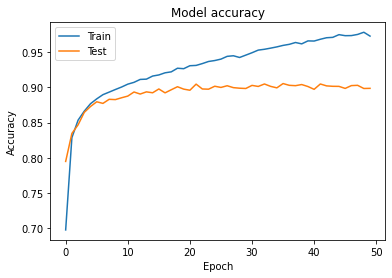

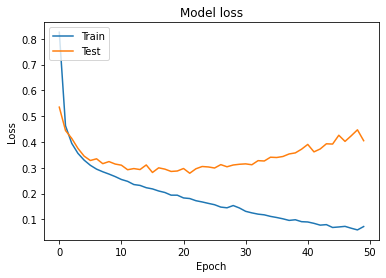

Time per epoch: [19.187290906906128, 18.369499921798706, 18.38557457923889, 18.49495577812195, 18.598509550094604, 18.310115337371826, 18.650180339813232, 18.708702564239502, 18.627760648727417, 18.93387246131897, 18.561747312545776, 18.68915343284607, 18.574522495269775, 18.56587243080139, 18.771092176437378, 18.894336462020874, 18.719486713409424, 18.69347643852234, 18.580578088760376, 18.590503215789795, 18.43761658668518, 18.38827681541443, 18.45369791984558, 18.3697292804718, 18.423006057739258, 18.433823347091675, 18.393160820007324, 18.30743956565857, 18.30310082435608, 18.332634449005127, 18.30624508857727, 18.68418049812317, 18.466816425323486, 18.354630708694458, 18.234275102615356, 18.22603178024292, 18.343814849853516, 18.205397605895996, 18.185787200927734, 18.23901104927063, 18.240622520446777, 18.304758071899414, 18.486051321029663, 18.346213817596436, 18.108450412750244, 18.40671730041504, 18.43729591369629, 18.279712438583374, 18.603525161743164, 18.27907967567444]
Tot

In [11]:
# Plot training & validation accuracy values
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print("Time per epoch: " + str(time_callback.times))
total_time = time_callback.times
total_time_str = sum(total_time)
print("Total time: " + str(total_time_str))

In [12]:
#Necessito di un array con tutte le labels, ho già class_names

test_predictions = modelLSTM.predict_classes(test_images)

conf_matr = confusion_matrix(y_true = test_labels, y_pred = test_predictions)
print(conf_matr)

con_mat_norm = np.around(conf_matr.astype('float') / conf_matr.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = class_names, 
                          columns = class_names)

[[851   9  17  20   2   2  96   0   3   0]
 [  3 985   1   7   2   0   1   0   1   0]
 [ 17   3 829   6  85   0  59   0   0   1]
 [ 13  10  24 886  36   0  29   0   2   0]
 [  1   1  75  19 861   0  42   0   1   0]
 [  0   0   0   0   0 986   0  10   0   4]
 [115   2  80  21  72   0 703   0   7   0]
 [  0   0   0   0   0  21   0 928   0  51]
 [  3   1   0   3   6   1   5   5 975   1]
 [  0   0   0   0   0   5   1  12   0 982]]


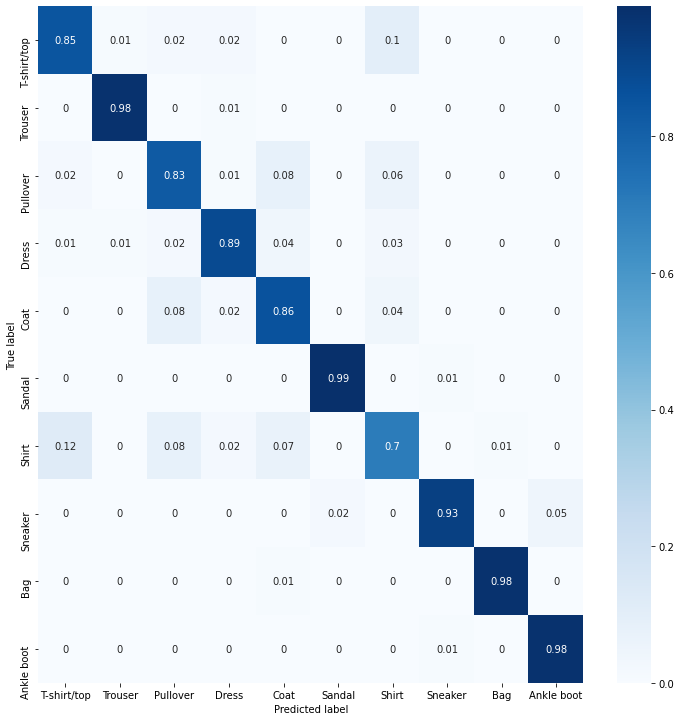

In [13]:
figure = plt.figure(figsize=(10, 10))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [21]:
modelLSTM2 = ks.Sequential()

modelLSTM2.add(LSTM(num_units1, input_shape=(time_steps, n_features), activation='relu', unit_forget_bias='true', return_sequences='true'))
modelLSTM2.add(LSTM(num_units2, unit_forget_bias='true', activation='relu'))
modelLSTM2.add(Dense(n_classes, activation=act))

modelLSTM2.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

modelLSTM2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 28, 256)           291840    
_________________________________________________________________
lstm_9 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 490,250
Trainable params: 490,250
Non-trainable params: 0
_________________________________________________________________


In [22]:
#Batch size should be (at most) the same number of hidden cells
time_callback = TimeHistory()
hist = modelLSTM2.fit(train_images, train_labels, batch_size = batch_size, validation_data=(test_images, test_labels), 
                     epochs=25, callbacks=[time_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 19s 320us/sample - loss: 0.8736 - acc: 0.6828 - val_loss: 0.5716 - val_acc: 0.7833
Epoch 2/25
60000/60000 [==============================] - 18s 298us/sample - loss: 0.4669 - acc: 0.8258 - val_loss: 0.4336 - val_acc: 0.8398
Epoch 3/25
60000/60000 [==============================] - 18s 297us/sample - loss: 0.3973 - acc: 0.8545 - val_loss: 0.4073 - val_acc: 0.8508
Epoch 4/25
60000/60000 [==============================] - 18s 299us/sample - loss: 0.3601 - acc: 0.8659 - val_loss: 0.4197 - val_acc: 0.8462
Epoch 5/25
60000/60000 [==============================] - 18s 294us/sample - loss: 0.3384 - acc: 0.8731 - val_loss: 0.3705 - val_acc: 0.8604
Epoch 6/25
60000/60000 [==============================] - 18s 292us/sample - loss: 0.3156 - acc: 0.8816 - val_loss: 0.3505 - val_acc: 0.8707
Epoch 7/25
60000/60000 [==============================] - 18s 293us/sample - loss: 0.3025 - acc: 0.8875 

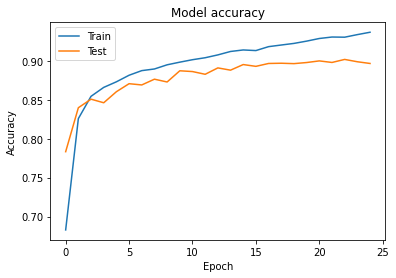

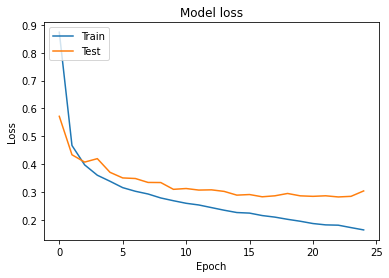

Time per epoch: [19.17312526702881, 17.861592531204224, 17.835719347000122, 17.914700031280518, 17.650564432144165, 17.50132441520691, 17.552565813064575, 17.966583490371704, 18.11226797103882, 18.018595933914185, 18.215439319610596, 18.250135898590088, 18.171395540237427, 18.093538999557495, 18.125845670700073, 18.069506645202637, 18.071068286895752, 18.082748651504517, 17.604740858078003, 17.636664390563965, 17.79309582710266, 17.201406002044678, 17.237462997436523, 17.260698080062866, 17.509137868881226]
Total time: 446.90992426872253


In [23]:
# Plot training & validation accuracy values
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

print("Time per epoch: " + str(time_callback.times))
total_time = time_callback.times
total_time_str = sum(total_time)
print("Total time: " + str(total_time_str))

In [24]:
#Necessito di un array con tutte le labels, ho già class_names

test_predictions = modelLSTM2.predict_classes(test_images)

conf_matr = confusion_matrix(y_true = test_labels, y_pred = test_predictions)
print(conf_matr)

con_mat_norm = np.around(conf_matr.astype('float') / conf_matr.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = class_names, 
                          columns = class_names)

[[866   2  12  28   3   3  81   0   5   0]
 [  1 992   0   4   0   0   2   0   1   0]
 [ 18   0 884   8  39   0  48   0   2   1]
 [ 15   6  20 920  20   1  16   0   2   0]
 [  2   1 127  32 769   0  67   0   2   0]
 [  0   0   0   2   0 982   0  13   1   2]
 [152   3  92  31  41   0 674   0   7   0]
 [  0   0   0   0   0   5   0 990   0   5]
 [  2   1   5   2   0   2   2   3 982   1]
 [  1   0   0   0   0   9   0  82   0 908]]


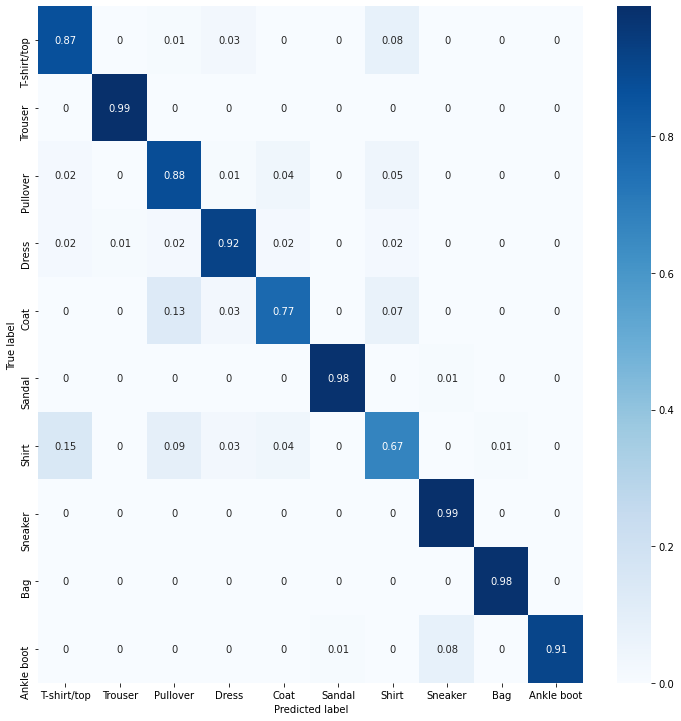

In [25]:
figure = plt.figure(figsize=(10, 10))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()